# The Spark Foundation- Data Science and Business Analystics 

## Submitted by Ankita Bhattacharjee

# Task 1

## To predict the percentage of a student if the student for 9.2 hrs/day

In [24]:
##Import all the libraries
import numpy as np
import pandas as pd

In [25]:
##Reading the data
student_df=pd.read_csv("C:/Users/S/Desktop/New folder (2)/student data .csv")

In [26]:
student_df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [27]:
student_df.shape

(25, 2)

Key Observation: There are 25 data points and 2 attributes

## Analysisng the data structure

In [28]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


Key Observations: There are 1 float colum and 1 integer column

# Analyse the statistical values of the dataset 

In [29]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking for null values

In [30]:
student_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in the dataset

# Checking for duplicate values

In [31]:
student_df.duplicated().sum()

0

Key Observations: There are no duplicate values in the dataset

# Visualisation of the dataset

In [32]:
## import libraries required for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

Visualize the Independent numeric variables against the dependent variable price using the Pairplot

In [33]:
plt.figure(figsize=(20,12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

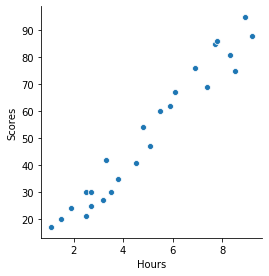

In [34]:
sns.pairplot(student_df, x_vars = 'Hours', y_vars= 'Scores',height=4, aspect=1,kind='scatter')
plt.show()

Key Observations: It is clear from the graph that the dependent variable(scores) and the independent variables are linearly related to each other

#  Check for any outliers in the numerical variables 

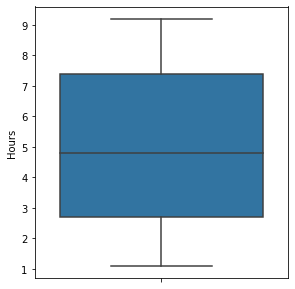

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y = 'Hours', data = student_df)

In [63]:
x=student_df.iloc[:,:-1].values
y=student_df.iloc[:,1].values

## Splitting the data into Train and Test set

In [66]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test,y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [68]:
from sklearn.linear_model import LinearRegression
linearregression=LinearRegression()
linearregression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
m=linearregression.coef_

In [70]:
c=linearregression.intercept_

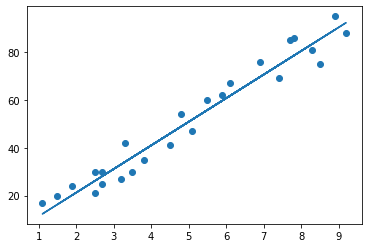

In [72]:
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [73]:
y_pred=linearregression.predict(X_test)

In [76]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


In [84]:
##Predicting the percentage of the student if he/she studies for 9.5 hours
Hours=9.5
Score=linearregression.predict([[Hours]])
print('If a student studies for {} hours he/she will score {} %'.format(Hours,Score) )

If a student studies for 9.5 hours he/she will score [95.27642918] %


Thus the student will score 95.27% if he/she studies for 9.5 hours

# Model Evaluation

In [86]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.762517892332273
R2 Score: 0.9309458862687439
